# LCPB 21-22 exercise 2: *Deep Neural Network (DNN)*

#### TASKS

1. Study the performance of the DNN when the number N of samples is
a) reduced
b) increased
c) augmented
Point 1.c means taking the given N=4000 samples, split them in training and validation, and
“augment” the training samples by generating artificial ones that are similar to the real samples. For
instance, a given sample x=(x1,x2) can be transformed to multiple copies (x1+s1, x2+s2) where
each (s1,s2) is a small random shift.
2. Implement a “grid search” as shown in NB11 to improve one or more of the aspects or
parameters of the model. Possible tests include: different activation units (sigmoid, relu, elu,
etc.), different minimization algorithms (ADAM, RMSprop, Nesterov, etc.), different
dropouts, different size or number of layers, etc.

##### *OPTIONAL*

3. Check if any other rescaling of data or initialization of weights may improve the accuracy of the
DNN.
4. Study different data, for instance generated by the second nonlinear function or other choices.

In [1]:
# importing cell
import numpy as np
import matplotlib.pyplot as plt
# DNN stuff
from keras.models import Sequential
from keras.layers import Dense, Dropout


# random seed for reproducibility
np.random.seed(42)

In [2]:
#!mkdir DATA

## Data generation


In [3]:
# defining non linear function to interpolate

#f is the labelling function,case c = 2 will only be used in the optional part
def f(x,c=1):
    r=0
    if c==1:
        if x[0]>-20 and x[1]>-40 and x[0]+x[1] < 40:
            r=1
    if c==2:
        if (np.sign(x.sum())*np.sign(x[0]))*np.cos(np.linalg.norm(x)/(2*np.pi))>0:
            r=1
    return r

#needed to save data and labels
def filename(s,TYPE=1):
    return "./DATA/"+s+"-for-DNN-"+str(TYPE)+".dat"


In [4]:
#Now we generate the original dataset

# number of data
N=4000

# size of each sample
L=2

# box size
B=100

TYPE=1


x, y = (np.random.random((N,2))-0.5)*B, np.zeros(N)
for i in range(N):
    # label data according to a nonlinear function "f"
    y[i] = f(x[i],c = 1)       

np.savetxt(filename("data_original",TYPE),x)
np.savetxt(filename("labels_original",TYPE),y,fmt="%d")

<function matplotlib.pyplot.show(close=None, block=None)>

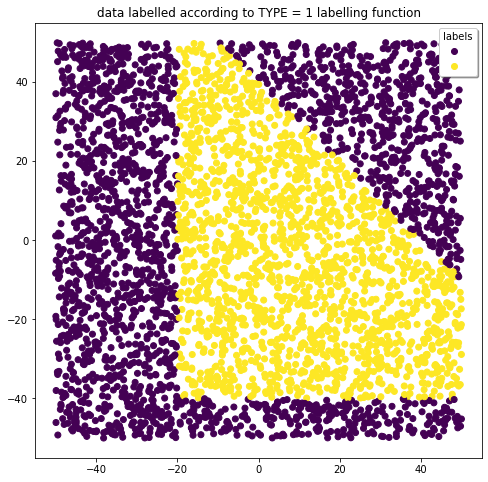

In [5]:
#plotting the original dataset with TYPE = 1
        
fig, ax = plt.subplots(nrows = 1, ncols = 1,figsize = (8,8))
scatter = ax.scatter(x[:,0],x[:,1],c=y)
ax.set_title("data labelled according to TYPE = 1 labelling function")
ax.legend(handles=scatter.legend_elements()[0], 
           title="labels", shadow = True)
plt.show

## Training


In [6]:
#percentage of data used for training
perc_train = 0.8

# Keras works with numpy arrays: just use them from the start
x = np.loadtxt(filename("data_original",TYPE), delimiter=' ')
y = np.loadtxt(filename("labels_original",TYPE), delimiter=' ')

N_train = int(perc_train * N)
print(f'data: {N}\ntrain: {N_train}') #printing the length of the whole dataset and the length of the training set

data: 4000
train: 3200


In [7]:
# Train-Test splitting
(x_train, y_train) = (x[0:N_train],y[0:N_train])
(x_test, y_test) = (x[N_train:],y[N_train:])
print("Train:",len(x_train),"\t test:",len(x_test))

Train: 3200 	 test: 800


In [8]:
# Rescaling data dividing them by their variance, the mean is already zero.
def Rescale(x):
    return x/50

x_train_norm = Rescale(x_train)
x_test_norm = Rescale(x_test)


In [9]:
# Definition of two models of neural network
nepoch = 400

model1 = Sequential()
model1.add(Dense(L,input_shape=(L,),activation='relu'))
model1.add(Dense(20,activation='relu'))
model1.add(Dense(20,activation='relu'))
model1.add(Dropout(0.2))
model1.add(Dense(1,activation='sigmoid'))

model2 = Sequential()
model2.add(Dense(L,input_shape=(L,),activation='sigmoid'))
model2.add(Dense(3,activation='sigmoid'))
model2.add(Dense(1,activation='sigmoid'))
    
print(model1.summary())
print(model2.summary())

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 2)                 6         
_________________________________________________________________
dense_1 (Dense)              (None, 20)                60        
_________________________________________________________________
dense_2 (Dense)              (None, 20)                420       
_________________________________________________________________
dropout (Dropout)            (None, 20)                0         
_________________________________________________________________
dense_3 (Dense)              (None, 1)                 21        
Total params: 507
Trainable params: 507
Non-trainable params: 0
_________________________________________________________________
None
Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Ou

In [10]:
# compile it with a given loss function and optimizer algorithm
model1.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

model2.compile(loss='binary_crossentropy',
              #optimizer='RMSprop',
              optimizer='adam',
              metrics=['accuracy'])

In [11]:
# TRAINING

fit1 = model1.fit(x_train_norm, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_test_norm,y_test),
               verbose=0)

fit2 = model2.fit(x_train_norm, y_train,
               epochs = nepoch, batch_size = 50,
               validation_data=(x_test_norm,y_test),
               verbose=0)


Okay so we have trained our model; now we look at the loss progression during training, both on training and validation sets.

In [12]:
# the .fit() method of the Keras Model class returns a history object,
# whose attribute History.history is basically a dictionary:
fit1.history.keys()

dict_keys(['loss', 'accuracy', 'val_loss', 'val_accuracy'])

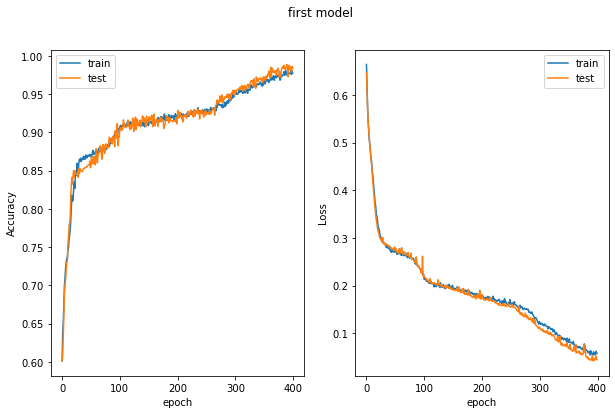

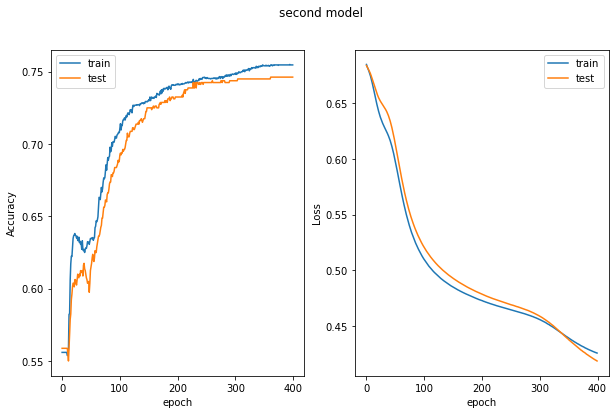

In [13]:
#plotting the accuracy and the loss for the first model
fig,axs=plt.subplots(1,2,figsize=(10,6.))
axs[0].plot(fit1.history['accuracy'],label="train")
axs[0].plot(fit1.history['val_accuracy'],label="test")
axs[0].set_xlabel('epoch')
axs[0].set_ylabel("Accuracy")

axs[1].plot(fit1.history['loss'],label="train")
axs[1].plot(fit1.history['val_loss'],label="test")
axs[1].set_xlabel('epoch')
axs[1].set_ylabel("Loss")

plt.suptitle('first model')
for ax in axs: ax.legend()

plt.show()

#plotting the accuracy and the loss for the second model
fig,axs=plt.subplots(1,2,figsize=(10,6.))
axs[0].plot(fit2.history['accuracy'],label="train")
axs[0].plot(fit2.history['val_accuracy'],label="test")
axs[0].set_xlabel('epoch')
axs[0].set_ylabel("Accuracy")

axs[1].plot(fit2.history['loss'],label="train")
axs[1].plot(fit2.history['val_loss'],label="test")
axs[1].set_xlabel('epoch')
axs[1].set_ylabel("Loss")
plt.suptitle('second model')
for ax in axs: ax.legend()
    
plt.show()

In [14]:
#let's generate the modified training sets

#reduced dataset
N_red = 2000
(x_train_red, y_train_red) = (x_train[:N_red], y_train[:N_red])
x_train_red = Rescale(x_train_red)

#increased dataset
N_in = 2000
x_train_plus, y_train_plus = (np.random.random((N_in,2))-0.5)*B, np.zeros(N_in)

for i in range(N_in):
    y_train_plus[i] = f(x_train_plus[i],TYPE)
    
x_train_in = np.vstack((x_train,x_train_plus))
y_train_in = np.hstack((y_train,y_train_plus))

x_train_in = Rescale(x_train_in)

#augmented dataset
#data augmentation can be done in different ways, we simply apply a random translation to the whole dataset 
x1_shift = np.random.randn() * 10 #shifts taken from a normal distribution
x2_shift = np.random.randn() * 10

x_train_shift, y_train_shift = np.array([x_train[:,0] + x1_shift, x_train[:,1] + x2_shift]).T, np.zeros(N_train)

for i in range(N_train):
    y_train_shift[i] = f(x_train_shift[i],TYPE)

x_train_aug = np.vstack((x_train,x_train_shift))
y_train_aug = np.hstack((y_train,y_train_shift))

x_train_aug = Rescale(x_train_aug)
#print(x_train[:,0]-x_train_shift[:,0]) ok it works correctly

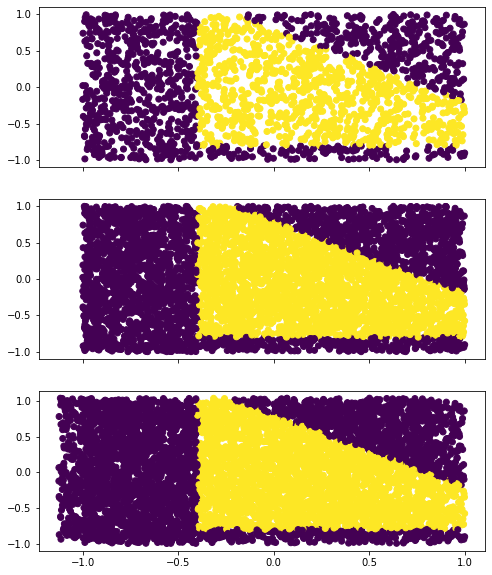

In [15]:
#plotting everything just to see if data have been correctly generated

fig,axs = plt.subplots(nrows=3, ncols = 1, sharex = True, figsize = (8,10))
axs[0].scatter(x_train_red[:,0],x_train_red[:,1], c = y_train_red)
axs[1].scatter(x_train_in[:,0], x_train_in[:,1], c = y_train_in)
axs[2].scatter(x_train_aug[:,0], x_train_aug[:,1], c = y_train_aug)
plt.show()


In [16]:
#Now train the two models using the modified dataset, this will need a very long time
fit1_red = model1.fit(x_train_red, y_train_red,
               epochs = nepoch, batch_size = 10,
               validation_data=(x_test_norm,y_test),
               verbose=0)

fit2_red = model2.fit(x_train_red, y_train_red,
               epochs = nepoch, batch_size = 10,
               validation_data=(x_test_norm,y_test),
               verbose=0)

fit1_in = model1.fit(x_train_in, y_train_in,
               epochs = nepoch, batch_size = 10,
               validation_data=(x_test_norm,y_test),
               verbose=0)

fit2_in = model2.fit(x_train_in, y_train_in,
               epochs = nepoch, batch_size = 10,
               validation_data=(x_test_norm,y_test),
               verbose=0)

fit1_aug = model1.fit(x_train_aug, y_train_aug,
               epochs = nepoch, batch_size = 10,
               validation_data=(x_test_norm,y_test),
               verbose=0)

fit2_aug = model2.fit(x_train_aug, y_train_aug,
               epochs = nepoch, batch_size = 10,
               validation_data=(x_test_norm,y_test),
               verbose=0)

KeyboardInterrupt: 

In [ ]:
#plotting the loss curves
fits1 = [fit1,fit1_red, fit1_in, fit1_aug]
fits2 = [fit2,fit2_red, fit2_in, fit2_aug]


for f1, f2 in zip(fits1,fits2):
    fig,axs=plt.subplots(1,2,figsize=(10,6.))
    axs[0].plot(f1.history['loss'],label="train")
    axs[0].plot(f1.history['val_loss'],label="test")
    axs[0].set_xlabel('epoch')
    axs[0].set_ylabel("Loss")
    axs[0].set_title('model1')

    axs[1].plot(f2.history['loss'],label="train")
    axs[1].plot(f2.history['val_loss'],label="test")
    axs[1].set_xlabel('epoch')
    axs[1].set_ylabel("Loss")
    axs[1].set_title('model2')
    for ax in axs: ax.legend()
    plt.tight_layout()
    plt.show()
    